In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Mall_Customers.csv


In [304]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [305]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python')

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [307]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [308]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [309]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [311]:
df.select_dtypes(include='object')

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


In [312]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

In [313]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [314]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [315]:
df_obj= pd.get_dummies(df_obj, drop_first=True)

In [316]:
Final_df= pd.concat([df_num, df_obj], axis=1)

In [317]:
Final_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

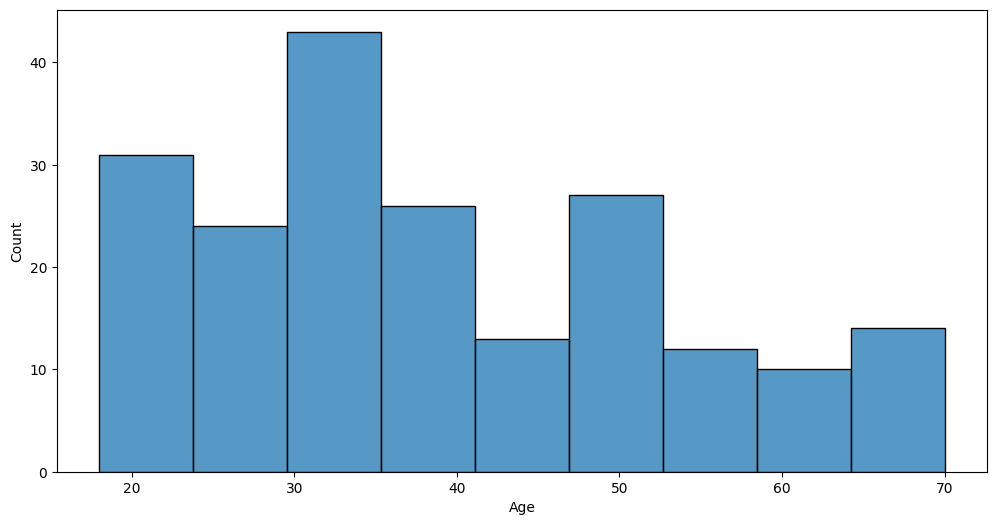

In [318]:
plt.figure(figsize=(12,6))
sns.histplot(data=Final_df, x='Age')

<Axes: xlabel='Gender_Male', ylabel='count'>

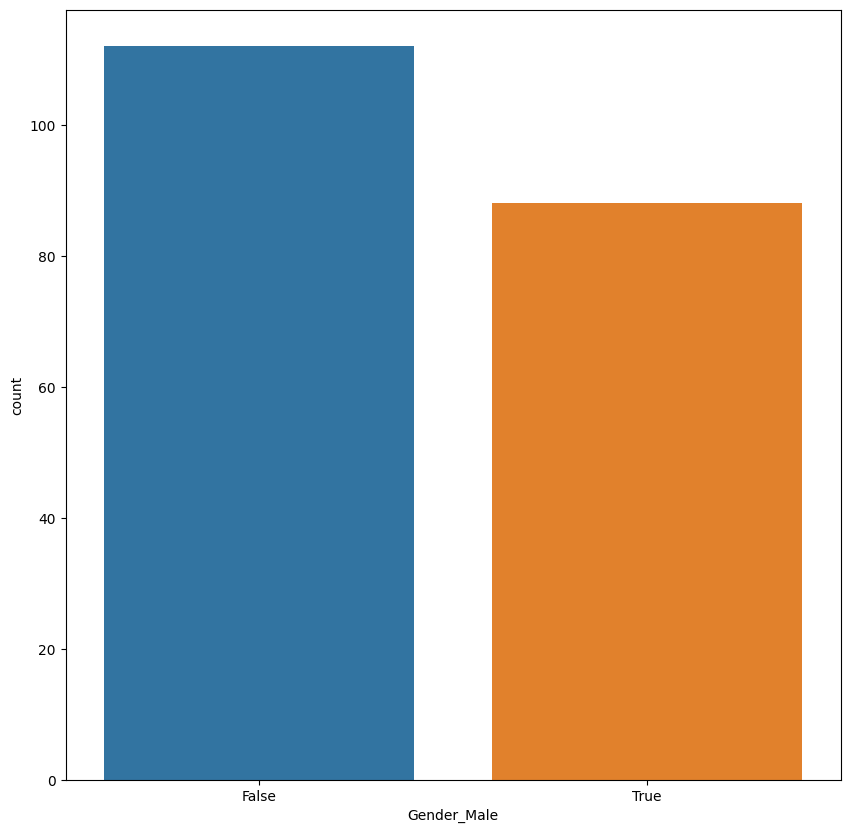

In [319]:
plt.figure(figsize=(10,10))
sns.countplot(x='Gender_Male', data=Final_df)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

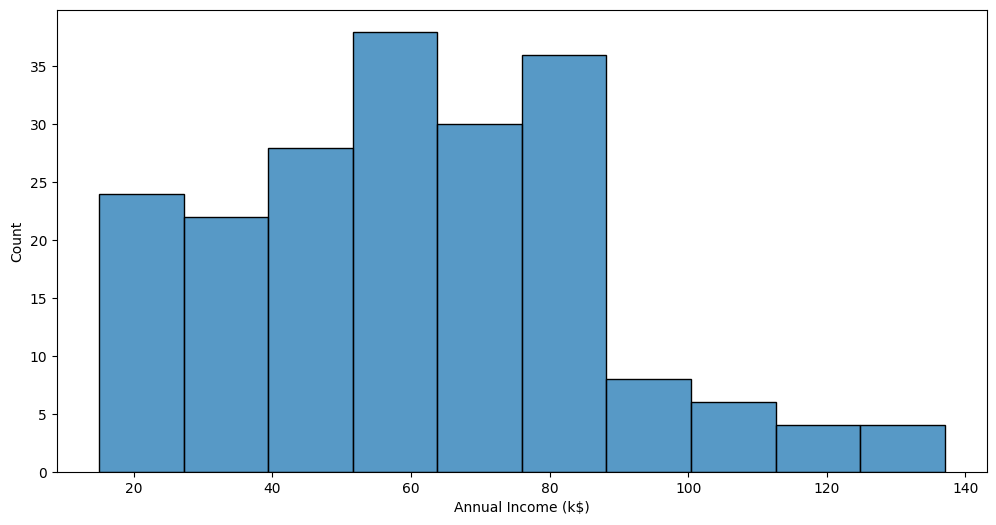

In [320]:
plt.figure(figsize=(12, 6))
sns.histplot(data=Final_df, x='Annual Income (k$)')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

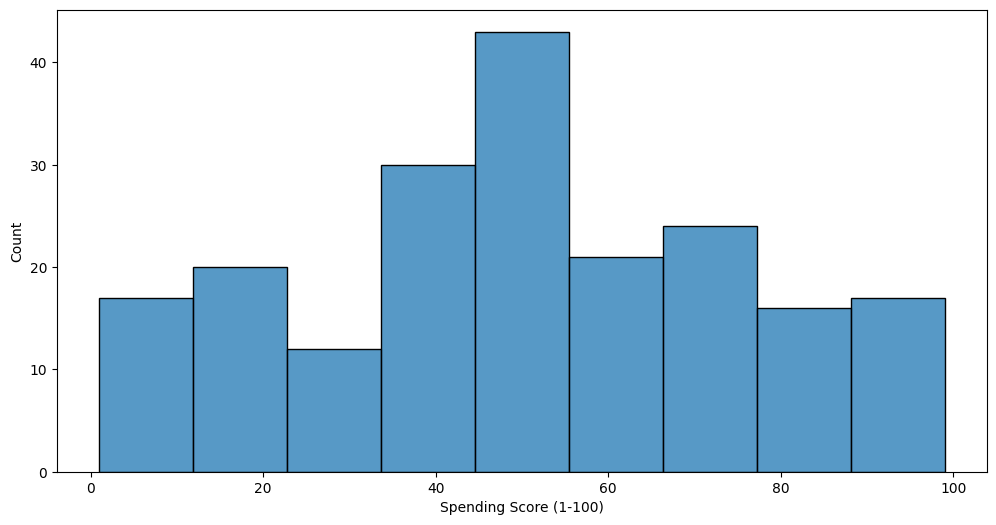

In [321]:
plt.figure(figsize=(12, 6))
sns.histplot(data=Final_df, x='Spending Score (1-100)')

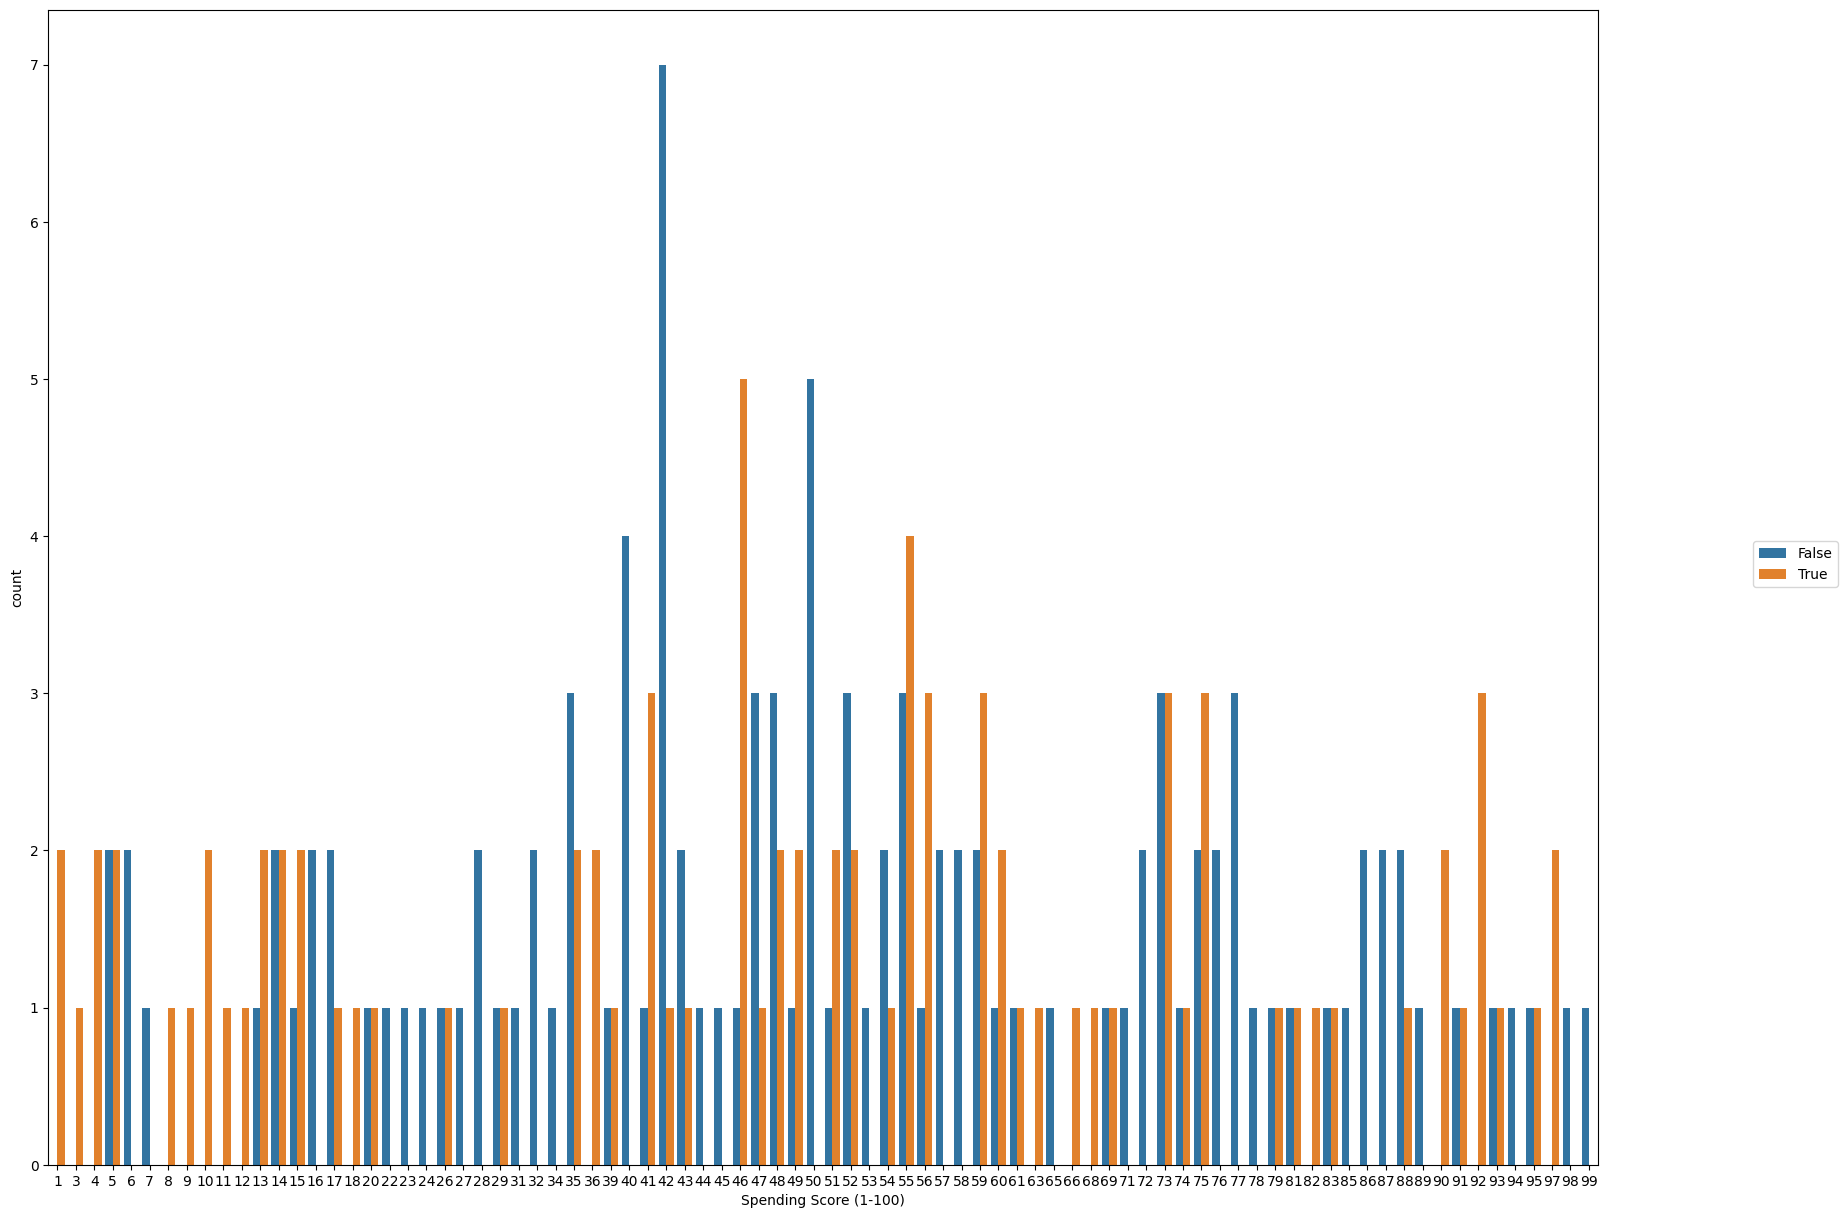

In [322]:
plt.figure(figsize=(20, 15))
sns.countplot(data=Final_df, x='Spending Score (1-100)', hue='Gender_Male' )
plt.legend(loc=(1.1, 0.5))

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

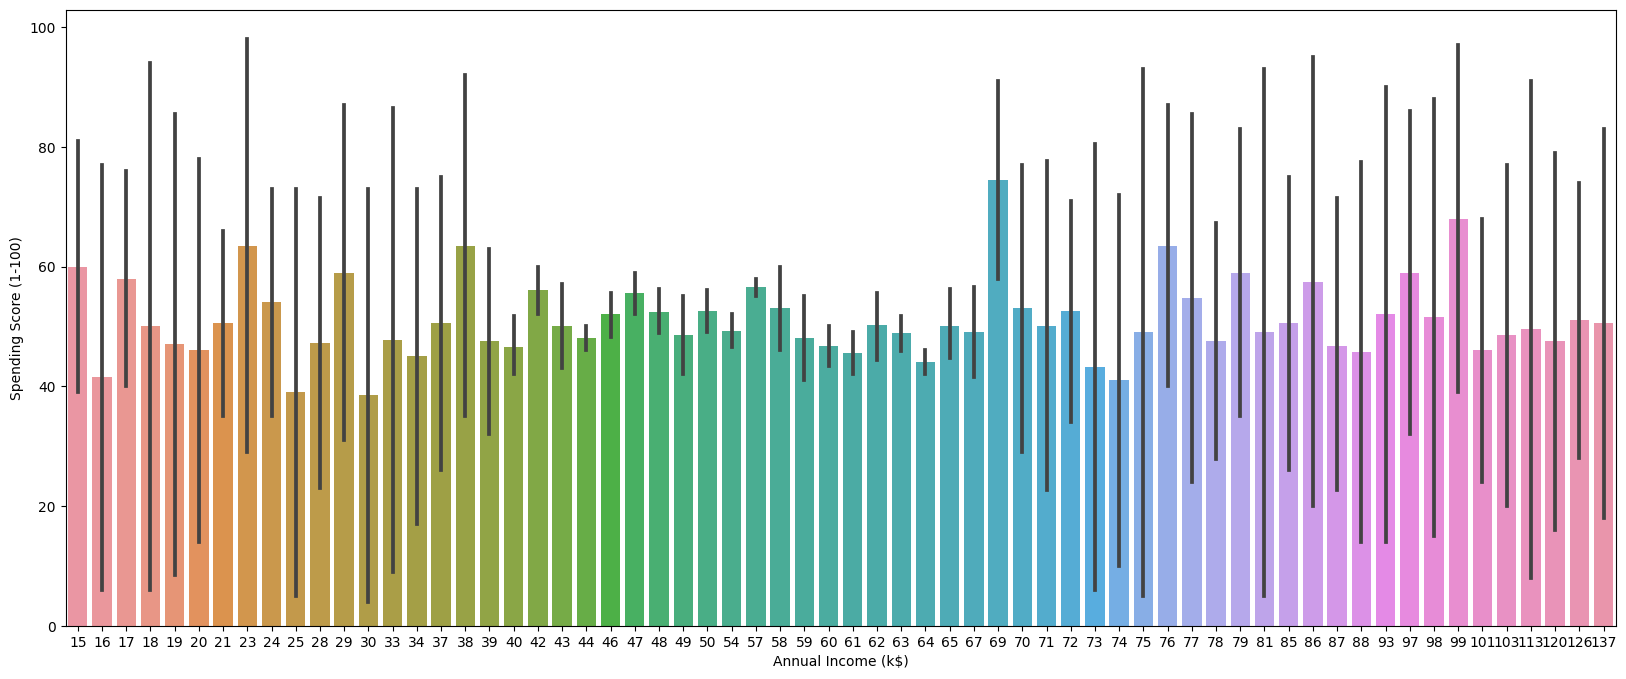

In [323]:
plt.figure(figsize=(20,8))
sns.barplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=Final_df)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

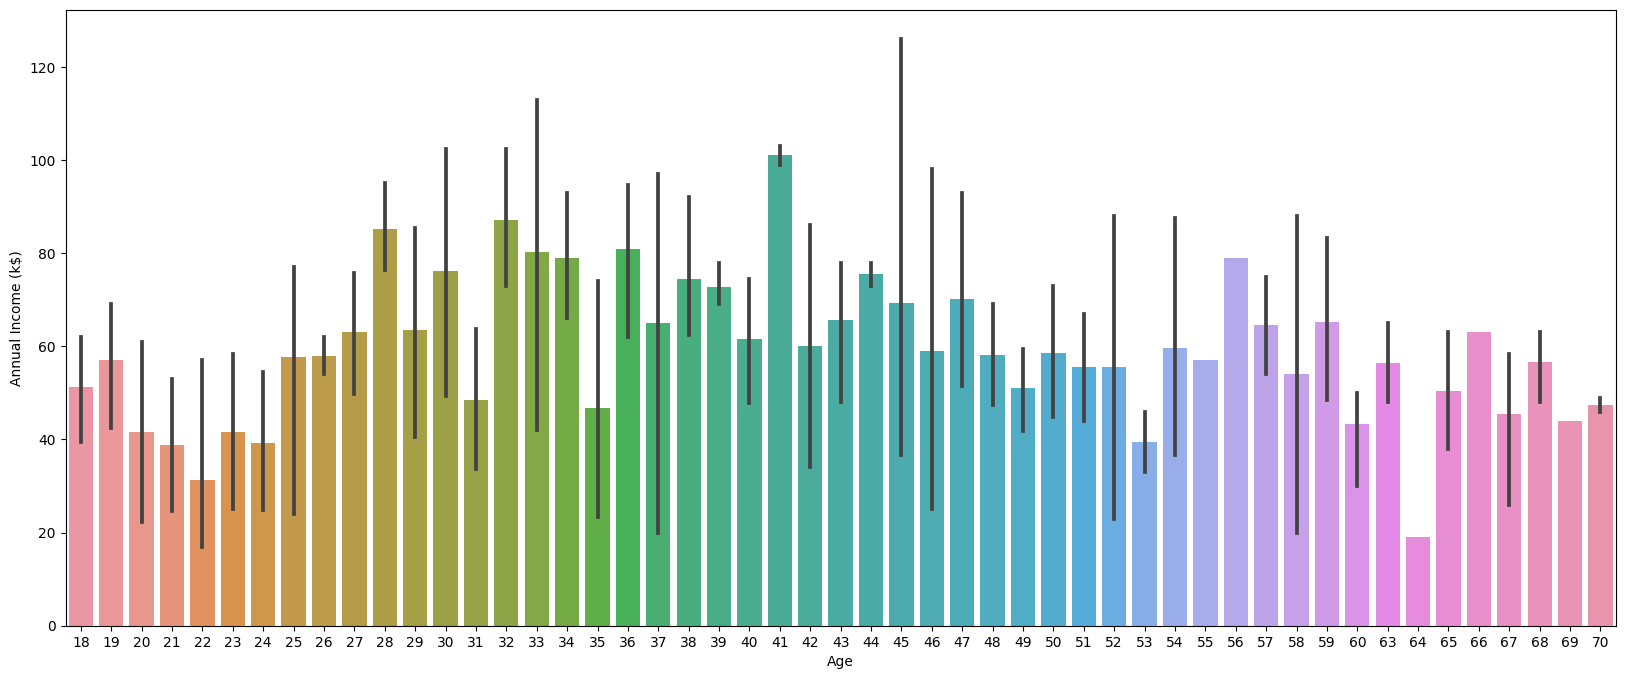

In [324]:
plt.figure(figsize=(20,8))
sns.barplot(x='Age',y='Annual Income (k$)',data=Final_df)

In [325]:
from sklearn.preprocessing import StandardScaler

In [326]:
scaler = StandardScaler()

In [327]:
scaled_X= scaler.fit_transform(Final_df) 

In [328]:
scaled_X

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.49824268, -1.06573534, -1.5

In [329]:
from sklearn.cluster import KMeans

In [330]:
model = KMeans(n_clusters=2)

In [331]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [332]:
len(scaled_X)

200

In [333]:
len(cluster_labels)

200

In [334]:
Final_df['Cluster']=cluster_labels

<Axes: >

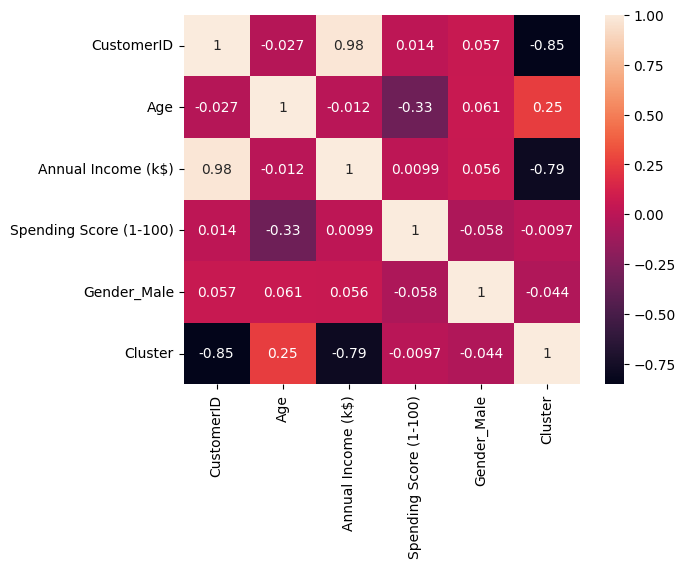

In [335]:
sns.heatmap(Final_df.corr(), annot=True)

In [336]:
Final_df.corr()['Cluster'].sort_values()

CustomerID               -0.852640
Annual Income (k$)       -0.793695
Gender_Male              -0.044376
Spending Score (1-100)   -0.009718
Age                       0.254193
Cluster                   1.000000
Name: Cluster, dtype: float64

<Axes: >

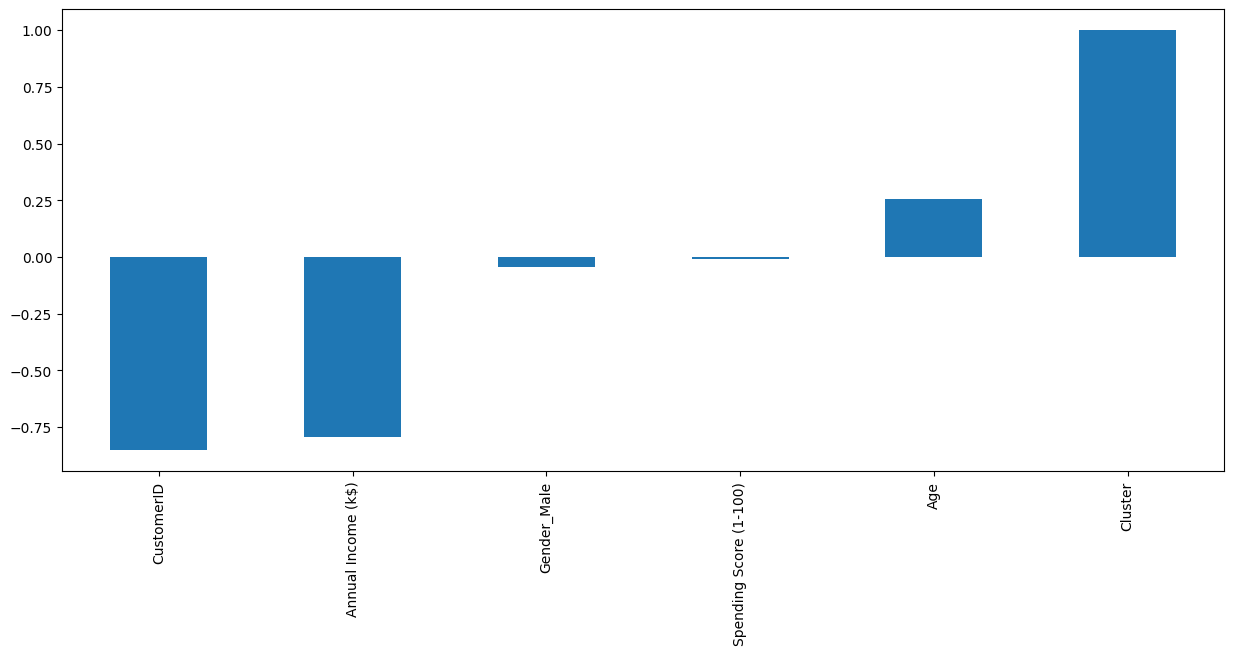

In [337]:
plt.figure(figsize=(15,6))
Final_df.corr()['Cluster'].sort_values().plot(kind='bar')

In [338]:
ssd= []

for k in range (2, 10):
    model=KMeans(n_clusters=k)
    
    model.fit(scaled_X)
    #inertia:caculate ssd
    ssd.append(model.inertia_) 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [339]:
ssd

[715.2750473761117,
 574.5325447735925,
 458.1834192867399,
 389.4085104827474,
 340.19125691839787,
 294.79299276192233,
 257.00529807132597,
 222.7896918592445]

Text(0, 0.5, 'Sum of Squared Distances')

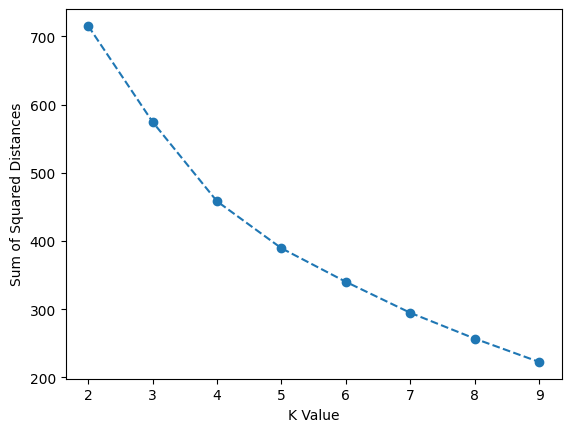

In [340]:
plt.plot(range(2,10), ssd, 'o--')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')

In [341]:
pd.Series(ssd).diff()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0           NaN
1   -140.742503
2   -116.349125
3    -68.774909
4    -49.217254
5    -45.398264
6    -37.787695
7    -34.215606
dtype: float64

<Axes: >

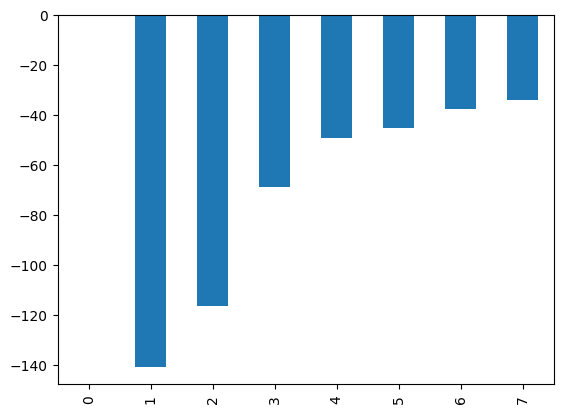

In [342]:
pd.Series(ssd).diff().plot(kind='bar')

In [343]:
new_model = KMeans(n_clusters=5)

In [344]:
new_cluster_labels= new_model.fit_predict(scaled_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [345]:
new_cluster_labels

array([1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 2, 2, 1, 3, 3, 2, 1,
       3, 3, 1, 1, 2, 3, 3, 3, 2, 1, 3, 2, 1, 3, 2, 2, 2, 3, 1, 2, 3, 1,
       1, 3, 3, 1, 2, 3, 3, 1, 3, 1, 2, 1, 1, 3, 2, 1, 2, 1, 3, 2, 2, 2,
       2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 4, 3, 3, 4, 0, 4, 0, 4, 2, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

In [346]:
Final_df['Cluster']=new_cluster_labels

In [347]:
X = Final_df.iloc[:,[2,3,4]].values

In [348]:
X[:5]

array([[15, 39, True],
       [15, 81, True],
       [16, 6, False],
       [16, 77, False],
       [17, 40, False]], dtype=object)

In [349]:
y= new_model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [350]:
y

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

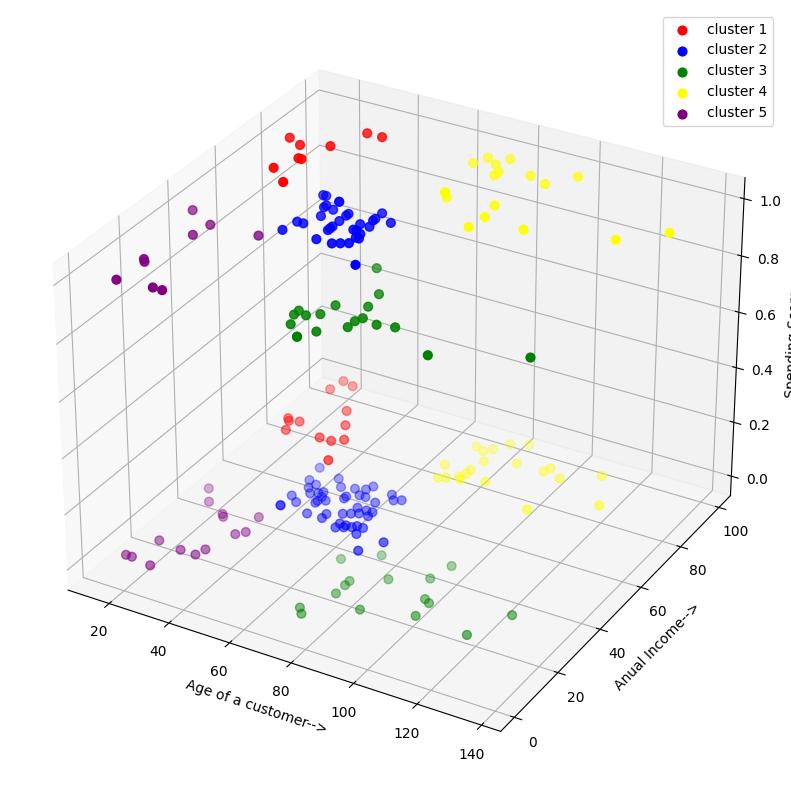

In [351]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 0,0],X[y == 0,1],X[y == 0,2], s = 40 , color = 'red', label = "cluster 1")
ax.scatter(X[y == 1,0],X[y == 1,1],X[y == 1,2], s = 40 , color = 'blue', label = "cluster 2")
ax.scatter(X[y == 2,0],X[y == 2,1],X[y == 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(X[y == 3,0],X[y == 3,1],X[y == 3,2], s = 40 , color = 'yellow', label = "cluster 4")
ax.scatter(X[y == 4,0],X[y == 4,1],X[y == 4,2], s = 40 , color = 'purple', label = "cluster 5")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()
